In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from collections import Counter
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [3]:
cd data/

C:\Users\mharouna\Desktop\hamoye\Stage E\data


In [4]:
df = pd.read_csv('president-1976-2016.csv')

In [5]:
df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes'],
      dtype='object')

In [6]:
df.shape

(3740, 14)

In [7]:
df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
5,1976,Alabama,AL,1,63,41,US President,"Macbride, Roger",libertarian,False,1481,1182850,20171015,NaN
6,1976,Alabama,AL,1,63,41,US President,NaN,NaN,True,308,1182850,20171015,NaN
7,1976,Alaska,AK,2,94,81,US President,"Ford, Gerald",republican,False,71555,123574,20171015,NaN
8,1976,Alaska,AK,2,94,81,US President,"Carter, Jimmy",democrat,False,44058,123574,20171015,NaN
9,1976,Alaska,AK,2,94,81,US President,"Macbride, Roger",libertarian,False,6785,123574,20171015,NaN


In [8]:
df.drop(['office','notes','version','writein','state_ic', 'state_cen','state_po','state_fips'], axis = 1, inplace=True)

In [9]:
df.isna().sum()

year                0
state               0
candidate         266
party             336
candidatevotes      0
totalvotes          0
dtype: int64

In [10]:
df.head()

,year,state,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,"Ford, Gerald",republican,504070,1182850
2,1976,Alabama,"Maddox, Lester",american independent party,9198,1182850
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",prohibition,6669,1182850
4,1976,Alabama,"Hall, Gus",communist party use,1954,1182850


In [11]:
df.dropna(inplace=True)

In [12]:
df.drop_duplicates(subset=['year','candidate', 'state'], inplace=True)

In [13]:
#Because a candidate may appear in more than one election, We make the candidate unique in every election by 
#concatenatiing the canditate with the year of election (The unique candidata becomes canditate_year)
candidate = [i for i in df.candidate]
year = df.year.tolist()
df.candidate = [candidate[i] + '_' + str(year[i]) for i in range(len(year))]
df.tail(2)

,year,state,candidate,party,candidatevotes,totalvotes
3734,2016,Wyoming,"Johnson, Gary_2016",libertarian,13287,258788
3738,2016,Wyoming,"Castle, Darrell L._2016",constitution party,2042,258788


Instead of having candidatevotes and totalvotes as two separate columns, I perform feature engineering to create a new column called candidatevotes_propotion which combines the two column. This operation also perform data scaling.

$candidatevotes\_propotion = \frac{candidatevotes}{totalvotes}$

In [14]:
df['candidatevotes_propotion'] = df['candidatevotes']/df['totalvotes']
df.head(3)

,year,state,candidate,party,candidatevotes,totalvotes,candidatevotes_propotion
0,1976,Alabama,"Carter, Jimmy_1976",democrat,659170,1182850,0.557273
1,1976,Alabama,"Ford, Gerald_1976",republican,504070,1182850,0.426149
2,1976,Alabama,"Maddox, Lester_1976",american independent party,9198,1182850,0.007776


**Transform the dataset from long format to a wide format**

With this transformation, the data corresponding to each unique candidate is merged into a single row, this solve the problem of having a candiate's data split across several rows.

In [15]:
df_wide = df.pivot(index='candidate', columns='state', values='candidatevotes_propotion').reset_index()
df_wide.head(2)

state,candidate,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Alexander, Stewart_2012",NaN,NaN,NaN,NaN,NaN,0.000120,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Allen, Jonathan_2008",NaN,NaN,NaN,NaN,NaN,0.000145,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_wide.fillna(0, inplace=True)
df_wide.head(3)

state,candidate,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Alexander, Stewart_2012",0.0,0.0,0.0,0.0,0.0,0.000120,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Allen, Jonathan_2008",0.0,0.0,0.0,0.0,0.0,0.000145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Amondson, Gene_2004",0.0,0.0,0.0,0.0,0.0,0.000177,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
candidate_party = df[['candidate', 'party']].drop_duplicates(subset=['candidate']).reset_index().drop('index', axis=1)
candidate_party.tail(2)

,candidate,party
221,"Moorehead, Monica_2016",workers world party
222,"Skewes, Peter_2016",american


In [18]:
#bring back the column for party
df2 = pd.merge(df_wide, candidate_party, how='inner', on=['candidate'])
df2.sample(5)

,candidate,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,party
20,"Boss, Jeffery_2012",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nsa did 911
92,"Haylard, Helen_1992",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,workers league
19,"Boss, Jeffery_2008",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vote here
32,"Bush, George W._2004",0.624607,0.610653,0.548694,0.543060,0.443577,0.517111,0.439473,0.457528,0.093398,...,0.567991,0.610858,0.715359,0.388013,0.537320,0.456403,0.560707,0.493199,0.687396,republican
203,"Trump, Donald J._2016",0.620831,0.512815,0.486716,0.605741,0.316171,0.432514,0.409269,0.419228,0.040704,...,0.607220,0.522347,0.455408,0.297594,0.444276,0.368327,0.686306,0.472182,0.673984,republican


In [19]:
party = []
 
for party_name in df2.party:
    if party_name.lower() != 'democrat' or party_name.lower() != 'republican':
        party.append('others')
    else:
        party.append(party_name)
    
df2['party'] = party

**Encode party variable**

In [20]:
parties = {'democrat': 1, 'republican': 2, 'others': 3}
df2['party'] = df2['party'].replace(parties)

**Create a target variable**

In [21]:
#list of candiatates that have won presidential elections since 1976
presidents = ['Carter, Jimmy_1976', 'Reagan, Ronald_1980', 'Reagan, Ronald_1984', 'Bush, George H.W._1988', 
              'Clinton, Bill_1992', 'Clinton, Bill_1996', 'Bush, George W._2000', 'Bush, George W._2004', 
              'Obama, Barack H._2008', 'Obama, Barack H._2012', 'Trump, Donald J._2016']

In [22]:
#Create a target variable
# The value 1 implies that the candiate won the election while value 0 implies that the candiate lost the election
df2['target'] = df2['candidate'].isin(presidents).astype(int)

**describe the distribution of target variable** 

The table below describes the 
distribution of the target variable
0    212
1     11
Name: target, dtype: int64


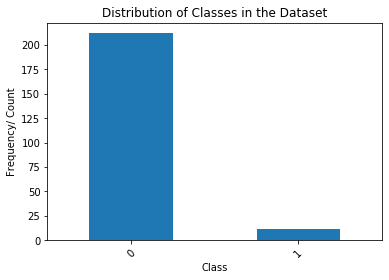

In [23]:
class_distribution = df2['target'].value_counts()
print('The table below describes the \ndistribution of the target variable')
print(class_distribution)
class_distribution.plot(kind='bar',)
plt.xlabel('Class')
plt.ylabel('Frequency/ Count')
plt.title('Distribution of Classes in the Dataset')
plt.xticks(rotation=45)
plt.show()

0    95.0
1     5.0
Name: target, dtype: float64


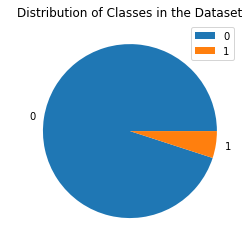

In [24]:
class_distribution_perc = round(df2['target'].value_counts()/len(df2['target'])*100)
print(class_distribution_perc)
class_distribution_perc.plot(kind='pie')
plt.ylabel(' ')
plt.title('Distribution of Classes in the Dataset')
plt.legend()
plt.show()

## Balancing the dataset:
To solve the imbalanced dataset problem, I use **SMOTE Algorithm** as the oversampling method

- **Synthetic Minority Oversampling Technique (SMOTE)** attempts to balance the data set by creating synthetic instances.
Data oversampling is a technique applied to generate data in such a way that it resembles the underlying distribution of the real data. 

In [25]:
X, y= df2.drop(columns=['candidate','target']), df2['target']

In [26]:
print('Original dataset distribution %s' % Counter(y))

sm = SMOTE(random_state=42)
X, target = sm.fit_sample(X, y.ravel()) 
print('Oversampled dataset distribution %s' % Counter(target))

Original dataset distribution Counter({0: 212, 1: 11})
Oversampled dataset distribution Counter({0: 212, 1: 212})


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [28]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [29]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


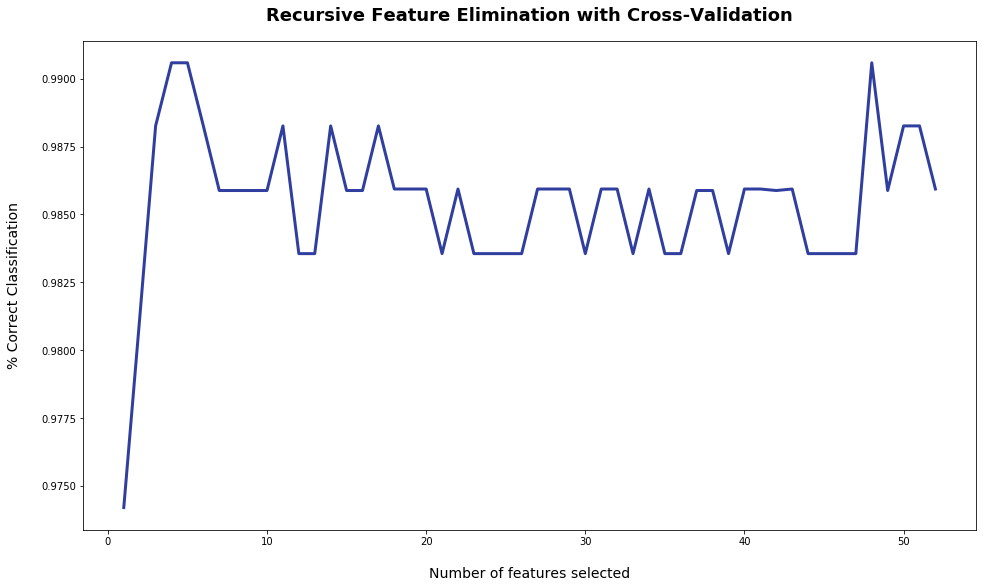

In [30]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [31]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
 26 27 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48 49 50 51]


In [32]:
rfecv.estimator_.feature_importances_

array([0.34019855, 0.26024061, 0.12874168, 0.27081916])

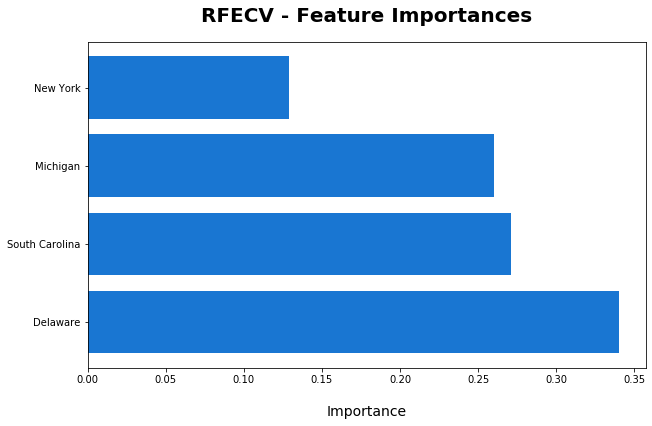

In [33]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

### Training model

In [34]:
print (X.shape)
#print('\n')
print(target.shape)

(424, 4)
(424,)


### split the data

In [35]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=0)

In [36]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Measuriing Classification Performance

In [37]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [38]:
new_predictions = log_reg.predict(X_test)

cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)
print(cnf_mat)

[[66  4]
 [ 0 58]]


In [39]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 97.0


In [40]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_test, y_pred=new_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        70
           1       0.94      1.00      0.97        58

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128



### Using XGB Classifier

In [41]:
from xgboost import XGBRFClassifier

extreme = XGBRFClassifier()

In [42]:
extreme.fit(X_train, y_train)
extreme_pred = extreme.predict(X_test)

In [43]:
#classification report
print(metrics.classification_report(y_test, extreme_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.97      1.00      0.98        58

    accuracy                           0.98       128
   macro avg       0.98      0.99      0.98       128
weighted avg       0.98      0.98      0.98       128



In [44]:
#xgboost using gradient boosting
from xgboost import XGBClassifier
extreme1 = XGBClassifier()
extreme1.fit(X_train, y_train)
extreme1_pred = extreme1.predict(X_test)

In [45]:
#classification report
print(metrics.classification_report(y_test, extreme1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        58

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [46]:
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(X_train, y_train)
light_pred = light.predict(X_test)

In [47]:
#classification report
print(metrics.classification_report(y_test, light_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.97      1.00      0.98        58

    accuracy                           0.98       128
   macro avg       0.98      0.99      0.98       128
weighted avg       0.98      0.98      0.98       128



In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier(max_depth=2, random_state=101)

In [50]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [51]:
clf_pred = clf.predict(X_test)

In [52]:
#classification report
print(metrics.classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.97      1.00      0.98        58

    accuracy                           0.98       128
   macro avg       0.98      0.99      0.98       128
weighted avg       0.98      0.98      0.98       128

